In [4]:
import numpy as np
import pandas as pd
import os
import spacy
import string
import pickle as pkl
import random
import matplotlib.pyplot as plt
from functools import partial

In [6]:
# load data 
def read_data_from_folder(path, label):
    '''
    PARAMETER PATH IS THE PATH OF YOUR LOCAL FOLDER
    '''
    filelist = os.listdir(path)
    reviews = []
    labels = []
    scores = []
    for infile in filelist:
        file = os.path.join(path,infile)
        r = read_data(file)
        reviews.append(r)
        labels.append(label)
        scores.append(file[:-4].split('_')[-1])
    return reviews, labels, scores

def read_data(file):
    '''
    Read each file into a list of strings. 
    '''
    with open(file) as f:
        lines = f.read()
    return lines

In [209]:
# get all data and split train/val
train_pos_path = "/Users/xiangtingyan/Downloads/NLP/HomeWork/HW1/aclImdb/train/pos"
train_neg_path = "/Users/xiangtingyan/Downloads/NLP/HomeWork/HW1/aclImdb/train/neg"

test_pos_path = "/Users/xiangtingyan/Downloads/NLP/HomeWork/HW1/aclImdb/test/pos"
test_neg_path = "/Users/xiangtingyan/Downloads/NLP/HomeWork/HW1/aclImdb/test/neg"

train_review_pos, train_label_pos, train_score_pos = read_data_from_folder(train_pos_path, 1)
train_review_neg, train_label_neg, train_score_neg = read_data_from_folder(train_neg_path, 0)

test_review_pos, test_label_pos, test_score_pos = read_data_from_folder(test_pos_path, 1)
test_review_neg, test_label_neg, test_score_neg = read_data_from_folder(test_neg_path, 0)

train_review = train_review_pos + train_review_neg
train_label = train_label_pos + train_label_neg
train_score = train_score_pos + train_score_neg

test_review = test_review_pos + test_review_neg
test_label = test_label_pos + test_label_neg
test_score = test_score_pos + test_score_neg

# shuffle train data
randnum = 28 #random.randint(0,100)
random.seed(randnum)
random.shuffle(train_review)
random.seed(randnum)
random.shuffle(train_label)
random.seed(randnum)
random.shuffle(train_score)

train_split = 20000
#validation
val_review = train_review[train_split:]
val_label = train_label[train_split:]
val_score = train_score[train_split:]
#train
train_review = train_review[:train_split]
train_label = train_label[:train_split]
train_score = train_score[:train_split]

In [7]:
# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation
def tokenize(sent):
    tokens = tokenizer(sent)
    return [token.text.lower() for token in tokens if (token.text not in punctuations)]

def tokenize_dataset(dataset, train=True):
    token_dataset = []
    all_tokens = []
    for sample in dataset:
        tokens = tokenize(sample)
        token_dataset.append(tokens)
        if train:
            all_tokens += tokens
    return token_dataset, all_tokens

def tokenize_simple(sent):
    tokens = tokenizer(sent)
    return [token.text for token in tokens]

def tokenize_dataset_simple(dataset, train=True):
    token_dataset = []
    all_tokens = []
    for sample in dataset:
        tokens = tokenize_simple(sample)
        token_dataset.append(tokens)
        if train:
            all_tokens += tokens
    return token_dataset, all_tokens

def tokenize_ngram(token_dataset, gram_n, train=True):
    token_ngram_dataset = []
    all_tokens_ngram = []
    for sample in token_dataset:
        tokens_ngram = list(map(lambda x: ' '.join(x), list(zip(*(sample[i:] for i in range(gram_n))))))
        token_ngram_dataset.append(tokens_ngram)
        if train:
            all_tokens_ngram += tokens_ngram
    return token_ngram_dataset, all_tokens_ngram

In [34]:
os.chdir('/Users/xiangtingyan/Downloads/NLP/HomeWork/HW1/normal_tokens') #/simple_tokens
# dump labels and scores
pkl.dump(train_label, open("train_label.p", "wb"))
pkl.dump(train_score, open("train_score.p", "wb"))

pkl.dump(val_label, open("val_label.p", "wb"))
pkl.dump(val_score, open("val_score.p", "wb"))

pkl.dump(test_label, open("test_label.p", "wb"))
pkl.dump(test_score, open("test_score.p", "wb"))

In [50]:
# 1-gram tokens
#val set tokens
print ("Tokenizing val data")
val_tokens_1gram, _ = tokenize_dataset(val_review, False)
pkl.dump(val_tokens_1gram, open("val_tokens_1gram.p", "wb"))

#test set tokens
print ("Tokenizing test data")
test_tokens_1gram, _ = tokenize_dataset(test_review, False)
pkl.dump(test_tokens_1gram, open("test_tokens_1gram.p", "wb"))

#train set tokens
print ("Tokenizing train data")
train_tokens_1gram, all_train_tokens_1gram = tokenize_dataset(train_review, True)
pkl.dump(train_tokens_1gram, open("train_tokens_1gram.p", "wb"))
pkl.dump(all_train_tokens_1gram, open("all_train_tokens_1gram.p", "wb"))

Tokenizing val data
Tokenizing test data
Tokenizing train data


In [28]:
prefix = '/Users/xiangtingyan/Downloads/NLP/HomeWork/HW1/simple_tokens/'
# load 1-gram tokens
train_tokens_1gram = pkl.load(open(prefix+"train_tokens_1gram.p", "rb"))

In [33]:
#2-gram tokens
print ("Tokenizing val data")
val_tokens_2gram_only, _ = tokenize_ngram(val_tokens_1gram, 2, False)
pkl.dump(val_tokens_2gram_only, open("val_tokens_2gram_only.p", "wb"))
#val_tokens_2gram = list(map(lambda x,y: x+y, val_tokens_1gram, val_tokens_2gram_only))
#pkl.dump(val_tokens_2gram, open("val_tokens_2gram.p", "wb"))

print ("Tokenizing test data")
test_tokens_2gram_only, _ = tokenize_ngram(test_tokens_1gram, 2, False)
pkl.dump(test_tokens_2gram_only, open("test_tokens_2gram_only.p", "wb"))
# test_tokens_2gram = list(map(lambda x,y: x+y, test_tokens_1gram, test_tokens_2gram_only))
# pkl.dump(test_tokens_2gram, open("test_tokens_2gram.p", "wb"))

print ("Tokenizing train data")
train_tokens_2gram_only, all_train_tokens_2gram_only = tokenize_ngram(train_tokens_1gram, 2, True)
pkl.dump(train_tokens_2gram_only, open("train_tokens_2gram_only.p", "wb"))
pkl.dump(all_train_tokens_2gram_only, open("all_train_tokens_2gram_only.p", "wb"))
# train_tokens_2gram = list(map(lambda x,y: x+y, train_tokens_1gram, train_tokens_2gram_only))
# pkl.dump(train_tokens_2gram, open("train_tokens_2gram.p", "wb"))
# all_train_tokens_2gram = all_train_tokens_2gram_only + all_train_tokens_1gram
# pkl.dump(all_train_tokens_2gram, open("all_train_tokens_2gram.p", "wb"))

Tokenizing train data


In [31]:
# 3-gram tokens
print ("Tokenizing val data")
val_tokens_3gram_only, _ = tokenize_ngram(val_tokens_1gram, 3, False)
pkl.dump(val_tokens_3gram_only, open("val_tokens_3gram_only.p", "wb"))

print ("Tokenizing test data")
test_tokens_3gram_only, _ = tokenize_ngram(test_tokens_1gram, 3, False)
pkl.dump(test_tokens_3gram_only, open("test_tokens_3gram_only.p", "wb"))

print ("Tokenizing train data")
train_tokens_3gram_only, all_train_tokens_3gram_only = tokenize_ngram(train_tokens_1gram, 3, True)
pkl.dump(train_tokens_3gram_only, open("train_tokens_3gram_only.p", "wb"))
pkl.dump(all_train_tokens_3gram_only, open("all_train_tokens_3gram_only.p", "wb"))


Tokenizing train data


In [32]:
# 4-gram tokens
print ("Tokenizing val data")
val_tokens_4gram_only, _ = tokenize_ngram(val_tokens_1gram, 4, False)
pkl.dump(val_tokens_4gram_only, open("val_tokens_4gram_only.p", "wb"))

print ("Tokenizing test data")
test_tokens_4gram_only, _ = tokenize_ngram(test_tokens_1gram, 4, False)
pkl.dump(test_tokens_4gram_only, open("test_tokens_4gram_only.p", "wb"))

print ("Tokenizing train data")
train_tokens_4gram_only, all_train_tokens_4gram_only = tokenize_ngram(train_tokens_1gram, 4, True)
pkl.dump(train_tokens_4gram_only, open("train_tokens_4gram_only.p", "wb"))
pkl.dump(all_train_tokens_4gram_only, open("all_train_tokens_4gram_only.p", "wb"))

Tokenizing train data


In [21]:
from collections import Counter

# save index 0 for unk and 1 for pad
# PAD_IDX = 0
# UNK_IDX = 1

def build_vocab(all_tokens, max_vocab_size):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    PAD_IDX = 0
    UNK_IDX = 1
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

# convert token to id in the dataset
def token2index_dataset(tokens_data, token2id):
    UNK_IDX = 1
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

In [204]:
import torch
from torch.utils.data import Dataset

class NewsGroupDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list, max_sentence_length):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        self.max_sentence_length = max_sentence_length
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:self.max_sentence_length]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def newsgroup_collate_func(batch, MAX_SENTENCE_LENGTH):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

def create_dataset_obj(train,val,test,train_targets,val_targets,test_targets,BATCH_SIZE,max_len,newsgroup_collate_func):
    newsgroup_collate_func = partial(newsgroup_collate_func, MAX_SENTENCE_LENGTH=max_len)
    train_dataset = NewsGroupDataset(train, train_targets, max_len)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    val_dataset = NewsGroupDataset(val, val_targets, max_len)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=False)

    test_dataset = NewsGroupDataset(test, test_targets, max_len)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=False)
    return train_loader, val_loader, test_loader

In [23]:
# First import torch related libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim, 2)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

In [263]:
# running training models
def train_models(params, train_label, val_label, test_label):
    # build vocab
    train_tokens = params['train']
    val_tokens = params['val']
    #test_tokens = params['test']
    all_train_tokens = params['all_train_tokens']
    print('token sample: ', all_train_tokens[:2])

    print('vocab size: ', len(set(all_train_tokens)))
    max_vocab_size = params['max_vocab_size']
    token2id, id2token = build_vocab(all_train_tokens, max_vocab_size)

    # Lets check the dictionary by loading random token from it
    random_token_id = random.randint(0, len(id2token)-1)
    random_token = id2token[random_token_id]
    print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
    print ("Token {}; token id {}".format(random_token, token2id[random_token]))

    # transform tokens into index
    train_indices = token2index_dataset(train_tokens, token2id)
    val_indices = token2index_dataset(val_tokens, token2id)
    #test_indices = token2index_dataset(test_tokens, token2id)
    test_indices1 = [[0],[0],[0]]
    test_label1 = [0,0,0]

    # double checking
    print ("Train dataset size is {}".format(len(train_indices)))
    print ("Val dataset size is {}".format(len(val_indices)))
    #print ("Test dataset size is {}".format(len(test_indices)))

    # create dataset obj for models
    BATCH_SIZE = params['BATCH_SIZE']
    MAX_SENTENCE_LENGTH = params['MAX_SENTENCE_LENGTH']
    train_loader, val_loader, test_loader = \
        create_dataset_obj(train_indices, val_indices, test_indices1, train_label, val_label, test_label1, \
                           BATCH_SIZE, MAX_SENTENCE_LENGTH, newsgroup_collate_func)

    # build model
    emb_dim = params['emb_dim']
    model = BagOfWords(len(id2token), emb_dim)

    #parameter for training
    learning_rate = params['learning_rate']
    num_epochs = params['num_epochs'] # number epoch to train

    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss()  
    optimizer = params['optimizer'](model.parameters(), lr=learning_rate)
    lambda1 = params['lambda_scheduler'] # lambda step: 1 #-step*0.00002 
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)
    #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=200, gamma=0.8)

    train_loss = []

    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            scheduler.step()
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            train_loss.append(loss)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
        val_acc = test_model(val_loader, model)
        print('Epoch: [{}/{}], Validation Acc: {}'.format(epoch+1, num_epochs, val_acc))

    # print ("After training for {} epochs".format(num_epochs))
    # print ("Val Acc {}".format(test_model(val_loader, model)))
    return train_loss

In [24]:
# load labels and scores
prefix = '/Users/xiangtingyan/Downloads/NLP/HomeWork/HW1/normal_tokens/'
train_label = pkl.load(open(prefix+"train_label.p", "rb"))
train_score = pkl.load(open(prefix+"train_score.p", "rb"))

val_label = pkl.load(open(prefix+"val_label.p", "rb"))
val_score = pkl.load(open(prefix+"val_score.p", "rb"))

test_label = pkl.load(open(prefix+"test_label.p", "rb"))
test_score = pkl.load(open(prefix+"test_score.p", "rb"))

In [100]:
# load data from pickle
prefix = '/Users/xiangtingyan/Downloads/NLP/HomeWork/HW1/simple_tokens/'
# 1-gram
train_tokens_simple = pkl.load(open(prefix+"train_tokens_1gram.p", "rb"))
all_train_tokens_simple = pkl.load(open(prefix+"all_train_tokens_1gram.p", "rb"))
val_tokens_simple = pkl.load(open(prefix+"val_tokens_1gram.p", "rb"))
#test_tokens = pkl.load(open(prefix+"test_tokens_1gram.p", "rb"))

# n-gram
n = 3
train_tokens_simple_3 = pkl.load(open(prefix+"train_tokens_{}gram_only.p".format(n), "rb"))
all_train_tokens_simple_3 = pkl.load(open(prefix+"all_train_tokens_{}gram_only.p".format(n), "rb"))
val_tokens_simple_3 = pkl.load(open(prefix+"val_tokens_{}gram_only.p".format(n), "rb"))
test_tokens = pkl.load(open(prefix+"test_tokens_{}gram_only.p".format(n), "rb"))

In [71]:
prefix = '/Users/xiangtingyan/Downloads/NLP/HomeWork/HW1/normal_tokens/'
# 1-gram
train_tokens_nor = pkl.load(open(prefix+"train_tokens_1gram.p", "rb"))
all_train_tokens_nor = pkl.load(open(prefix+"all_train_tokens_1gram.p", "rb"))
val_tokens_nor = pkl.load(open(prefix+"val_tokens_1gram.p", "rb"))
#test_tokens = pkl.load(open(prefix+"test_tokens_1gram.p", "rb"))

# n-gram
n = 4
train_tokens_nor_4 = pkl.load(open(prefix+"train_tokens_{}gram_only.p".format(n), "rb"))
all_train_tokens_nor_4 = pkl.load(open(prefix+"all_train_tokens_{}gram_only.p".format(n), "rb"))
val_tokens_nor_4 = pkl.load(open(prefix+"val_tokens_{}gram_only.p".format(n), "rb"))
#test_tokens = pkl.load(open(prefix+"test_tokens_{}gram_only.p".format(n), "rb"))

In [163]:
params = {
    'train': train_tokens_nor,
    'val': val_tokens_nor,
    #'test': test_tokens,
    'all_train_tokens': all_train_tokens_nor,
    
    'max_vocab_size': 10000, #5000, 10000, 20000, 40000
    'emb_dim': 50, # 50, 100, 200
    'learning_rate': 0.01, # 0.05, 0.01, 0.002; linear, non-linear; 
    'optimizer': torch.optim.Adam, #torch.optim.Adam, partial(torch.optim.SGD, momentum=0.9)
    'lambda_scheduler': lambda step: 1, #0.9**(step), 
    
    #'train_label': train_label,
    #'val_label': val_label,
    #'test_label': test_label,
    
    'BATCH_SIZE': 32,
    'MAX_SENTENCE_LENGTH': 500,
    'num_epochs': 2
}

In [164]:
train_loss3 = train_models(params, train_label, val_label, test_label)

token sample:  ['garson', 'kanin']
vocab size:  91208
Token id 840 ; token gone
Token gone; token id 840
Train dataset size is 20000
Val dataset size is 5000
Epoch: [1/2], Step: [101/625], Validation Acc: 81.38
Epoch: [1/2], Step: [201/625], Validation Acc: 86.18
Epoch: [1/2], Step: [301/625], Validation Acc: 87.66
Epoch: [1/2], Step: [401/625], Validation Acc: 87.64
Epoch: [1/2], Step: [501/625], Validation Acc: 88.32
Epoch: [1/2], Step: [601/625], Validation Acc: 88.76
Epoch: [1/2], Validation Acc: 88.82
Epoch: [2/2], Step: [101/625], Validation Acc: 88.7
Epoch: [2/2], Step: [201/625], Validation Acc: 88.6
Epoch: [2/2], Step: [301/625], Validation Acc: 88.44
Epoch: [2/2], Step: [401/625], Validation Acc: 87.96
Epoch: [2/2], Step: [501/625], Validation Acc: 88.52
Epoch: [2/2], Step: [601/625], Validation Acc: 88.58
Epoch: [2/2], Validation Acc: 88.46


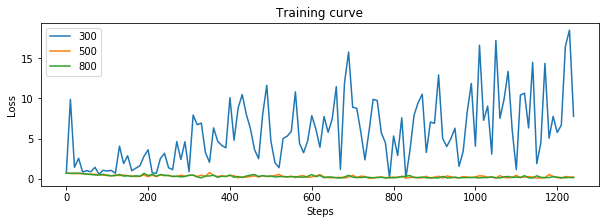

In [170]:
# plot learning curves
interval_s = 10
plt.figure(figsize=(10,3))
plt.plot(np.arange(0, len(train_loss1[:len(train_loss2)]), step=interval_s),train_loss1[:len(train_loss2):interval_s], label='300')
plt.plot(np.arange(0, len(train_loss2), step=interval_s),train_loss2[::interval_s], label='500')
plt.plot(np.arange(0, len(train_loss3), step=interval_s),train_loss3[::interval_s], label='800')
#plt.plot(np.arange(0, len(train_loss4), step=interval_s),train_loss4[::interval_s], label='exp')
plt.title('Training curve')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.show()

### The best model


In [260]:
params = {
    'train': train_tokens_nor,
    'val': val_tokens_nor,
    #'test': test_tokens,
    'all_train_tokens': all_train_tokens_nor,
    'test': test_tokens_nor,
    
    'max_vocab_size': 20000, #5000, 10000, 20000, 40000
    'emb_dim': 100, # 50, 100, 200
    'learning_rate': 0.01, # 0.05, 0.01, 0.002; linear, non-linear; 
    'optimizer': torch.optim.Adam, #torch.optim.Adam, partial(torch.optim.SGD, momentum=0.9)
    'lambda_scheduler': lambda step: 1, #0.9**(step), 
    
    #'train_label': train_label,
    #'val_label': val_label,
    #'test_label': test_label,
    
    'BATCH_SIZE': 32,
    'MAX_SENTENCE_LENGTH': 500,
    'num_epochs': 2
}

In [261]:
# build vocab
train_tokens = params['train']
val_tokens = params['val']
test_tokens = params['test']
all_train_tokens = params['all_train_tokens']
print('token sample: ', all_train_tokens[:2])

print('vocab size: ', len(set(all_train_tokens)))
max_vocab_size = params['max_vocab_size']
token2id, id2token = build_vocab(all_train_tokens, max_vocab_size)

# Lets check the dictionary by loading random token from it
random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]
print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

# transform tokens into index
train_indices = token2index_dataset(train_tokens, token2id)
val_indices = token2index_dataset(val_tokens, token2id)
test_indices = token2index_dataset(test_tokens, token2id)


# double checking
print ("Train dataset size is {}".format(len(train_indices)))
print ("Val dataset size is {}".format(len(val_indices)))
#print ("Test dataset size is {}".format(len(test_indices)))

# create dataset obj for models
BATCH_SIZE = params['BATCH_SIZE']
MAX_SENTENCE_LENGTH = params['MAX_SENTENCE_LENGTH']
train_loader, val_loader, test_loader = \
    create_dataset_obj(train_indices, val_indices, test_indices, train_label, val_label, test_label, \
                       BATCH_SIZE, MAX_SENTENCE_LENGTH, newsgroup_collate_func)

# build model
emb_dim = params['emb_dim']
model = BagOfWords(len(id2token), emb_dim)

#parameter for training
learning_rate = params['learning_rate']
num_epochs = params['num_epochs'] # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = params['optimizer'](model.parameters(), lr=learning_rate)
lambda1 = params['lambda_scheduler'] # lambda step: 1 #-step*0.00002 
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=200, gamma=0.8)

train_loss = []

for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        scheduler.step()
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        train_loss.append(loss)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))
    val_acc = test_model(val_loader, model)
    print('Epoch: [{}/{}], Validation Acc: {}'.format(epoch+1, num_epochs, val_acc))

# print ("After training for {} epochs".format(num_epochs))
# print ("Val Acc {}".format(test_model(val_loader, model)))

token sample:  ['garson', 'kanin']
vocab size:  91208
Token id 6095 ; token expects
Token expects; token id 6095
Train dataset size is 20000
Val dataset size is 5000
Epoch: [1/2], Step: [101/625], Validation Acc: 81.08
Epoch: [1/2], Step: [201/625], Validation Acc: 87.04
Epoch: [1/2], Step: [301/625], Validation Acc: 87.8
Epoch: [1/2], Step: [401/625], Validation Acc: 88.52
Epoch: [1/2], Step: [501/625], Validation Acc: 89.0
Epoch: [1/2], Step: [601/625], Validation Acc: 88.88
Epoch: [1/2], Validation Acc: 89.12
Epoch: [2/2], Step: [101/625], Validation Acc: 88.92
Epoch: [2/2], Step: [201/625], Validation Acc: 88.66
Epoch: [2/2], Step: [301/625], Validation Acc: 88.0
Epoch: [2/2], Step: [401/625], Validation Acc: 88.5
Epoch: [2/2], Step: [501/625], Validation Acc: 88.56
Epoch: [2/2], Step: [601/625], Validation Acc: 88.32
Epoch: [2/2], Validation Acc: 88.16


In [212]:
# validation results
val_prediction = []
val_label1 = []
model.eval()
for data, lengths, labels in val_loader:
    data_batch, length_batch, label_batch = data, lengths, labels
    outputs = F.softmax(model(data_batch, length_batch), dim=1)
    val_label1.extend([i for i in labels.numpy()]) 
    val_prediction.extend([i[0] for i in outputs.max(1, keepdim=True)[1].numpy()]) 
mistake_flag = np.array(val_prediction)==np.array(val_label)
wrong_index = np.where(mistake_flag==False)[0]
right_index = np.where(mistake_flag==True)[0]

In [248]:
# incorrect samples
n = 22
print('True label: {0}; prediction: {1}'.format(val_label[wrong_index[n]], val_prediction[wrong_index[n]]))
print('Review: ')
print(val_review[wrong_index[n]])

True label: 1; prediction: 0
Review: 
this movie is another on the list that i did not want to see. i was talked into it and dragged into the theater, but boy am i glad for that. i thought it was going to be just another love story, but it turns out to be SOOO much more than that. definatly an intellectual flick, one of those movies you have to pay attention to.


In [253]:
# correct samples
n = 22
print('True label: {0}; prediction: {1}'.format(val_label[right_index[n]], val_prediction[right_index[n]]))
print('Review: ')
print(val_review[right_index[n]])

True label: 1; prediction: 1
Review: 
Just read the original story which is written by Pu in 18th century. Strikingly, the movie despict the original spirit very well, though the plot was modified tremendously. The film language, the rhythm, the special effect are all from hollywood, but still there is a chinese core. It is amazing how Hark Tsui managed to combine them together. The result is pure beauty.


In [254]:
print("Test Acc {}".format(test_model(test_loader, model)))

Test Acc 86.284


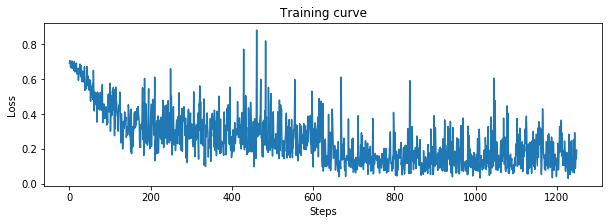

In [262]:
interval_s = 1
plt.figure(figsize=(10,3))
plt.plot(np.arange(0, len(train_loss), step=interval_s),train_loss[::interval_s], label='300')
plt.title('Training curve')
#plt.legend()
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.show()